# Visualization

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipyvizzu
import ipyvizzustory

In [4]:
df = pd.read_parquet('../Data/cleaned.parquet')
plt.style.use("Solarize_Light2")
fig_facecolor = "#fdf6e3bd"
ax_facecolor = "#eee8d5"

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1175 entries, 0 to 1199
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   ID del Cliente                 1175 non-null   object  
 1   Zona                           1175 non-null   category
 2   Canal                          1175 non-null   category
 3   Producto                       1175 non-null   category
 4   Monto de Venta                 1175 non-null   float64 
 5   Edad del Cliente               1175 non-null   int64   
 6   ¿Capacitado?                   1175 non-null   category
 7   Inversión en Publicidad        1155 non-null   float64 
 8   Mes                            1175 non-null   category
 9   Asesor                         1175 non-null   object  
 10  % Cumplimiento Objetivo        1175 non-null   float64 
 11  % Clientes Nuevos              1175 non-null   float64 
 12  Participación en Campañas      1175 non

In [6]:
# Convertir solo las categóricas a string
cat_cols = df.select_dtypes(['category']).columns
df[cat_cols] = df[cat_cols].astype(str)

In [7]:
df.to_parquet('../Data/cleaned.parquet', index=False)

## Univariate Analysis

In [8]:
col_continuous = df.describe().columns.tolist()
col_categorical = df.select_dtypes(include=['object', 'category']).columns.tolist()
col_categorical = [col for col in col_categorical if col not in ['ID del Cliente']]
print(f"Continuous columns: {col_continuous}")
print(f"Categorical columns: {col_categorical}")

Continuous columns: ['Monto de Venta', 'Edad del Cliente', 'Inversión en Publicidad', '% Cumplimiento Objetivo', '% Clientes Nuevos', 'Antigüedad del Asesor (meses)']
Categorical columns: ['Zona', 'Canal', 'Producto', '¿Capacitado?', 'Mes', 'Asesor', 'Participación en Campañas']


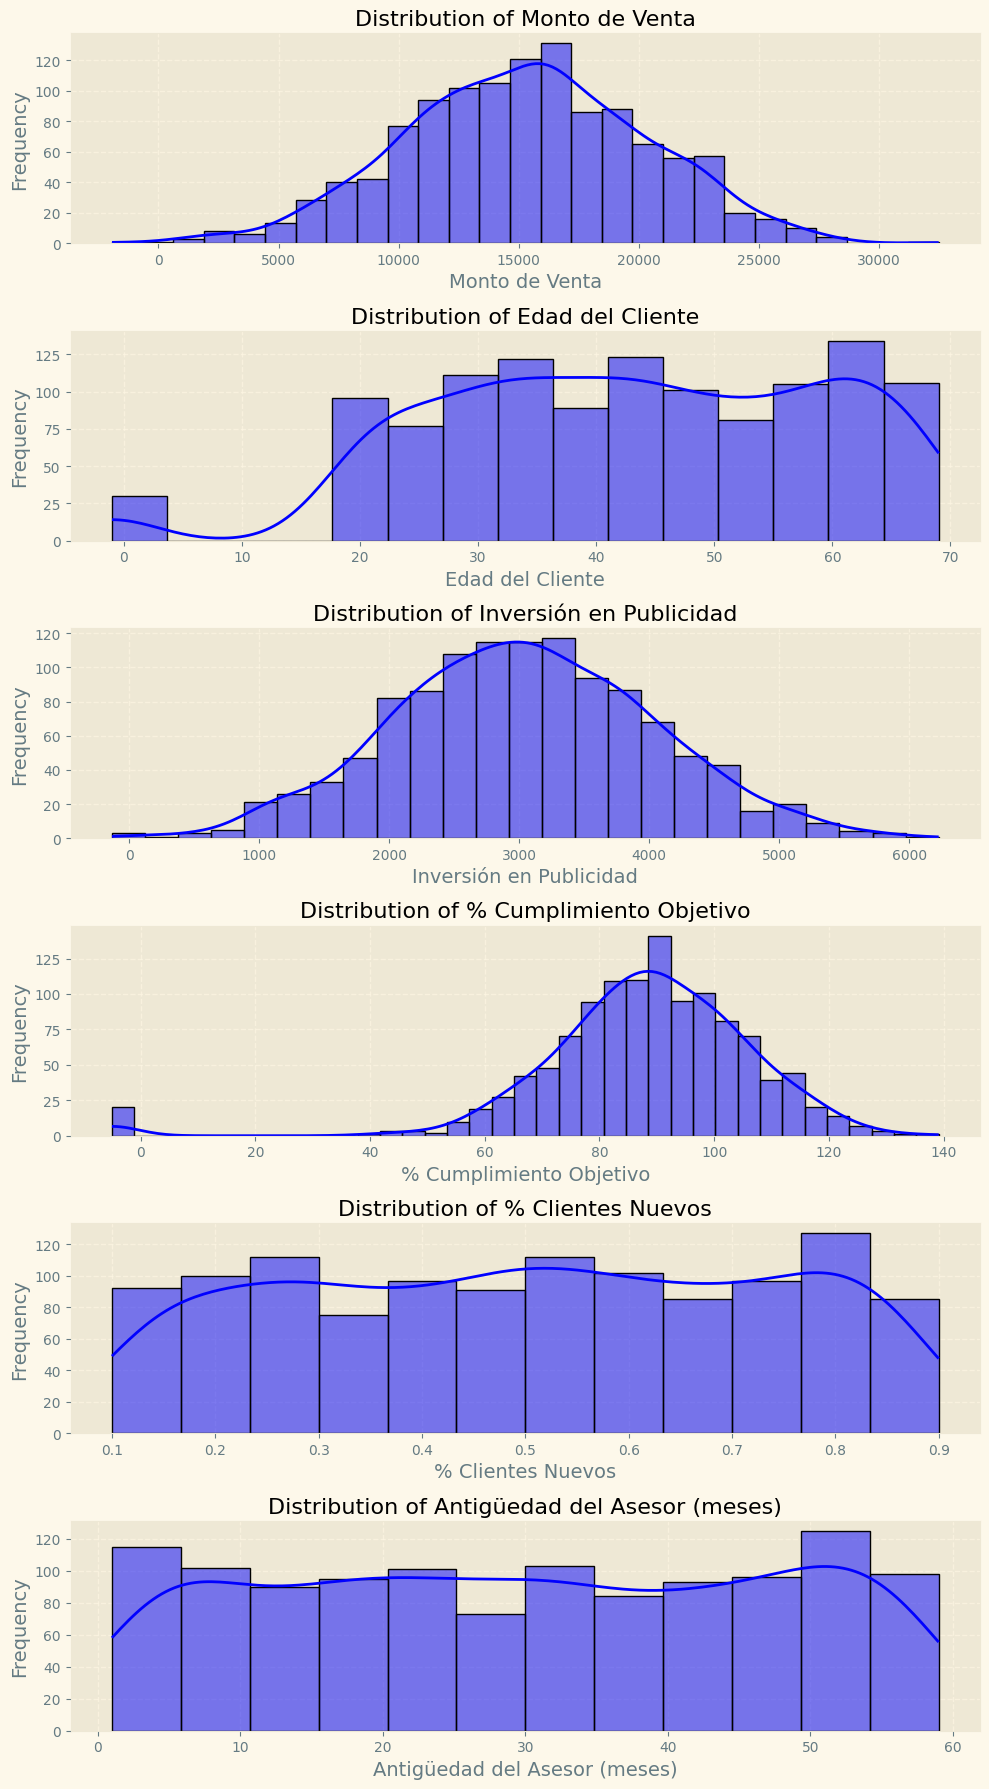

In [9]:
n = len(col_continuous)
fig, axes = plt.subplots(n, 1, figsize=(10, 3 * n), facecolor=fig_facecolor)
for i, col in enumerate(col_continuous):
    sns.histplot(df[col], ax=axes[i], kde=True, color='blue', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}', fontsize=16)
    axes[i].set_facecolor(ax_facecolor)
    axes[i].set_xlabel(col, fontsize=14)
    axes[i].set_ylabel('Frequency', fontsize=14)
    axes[i].grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

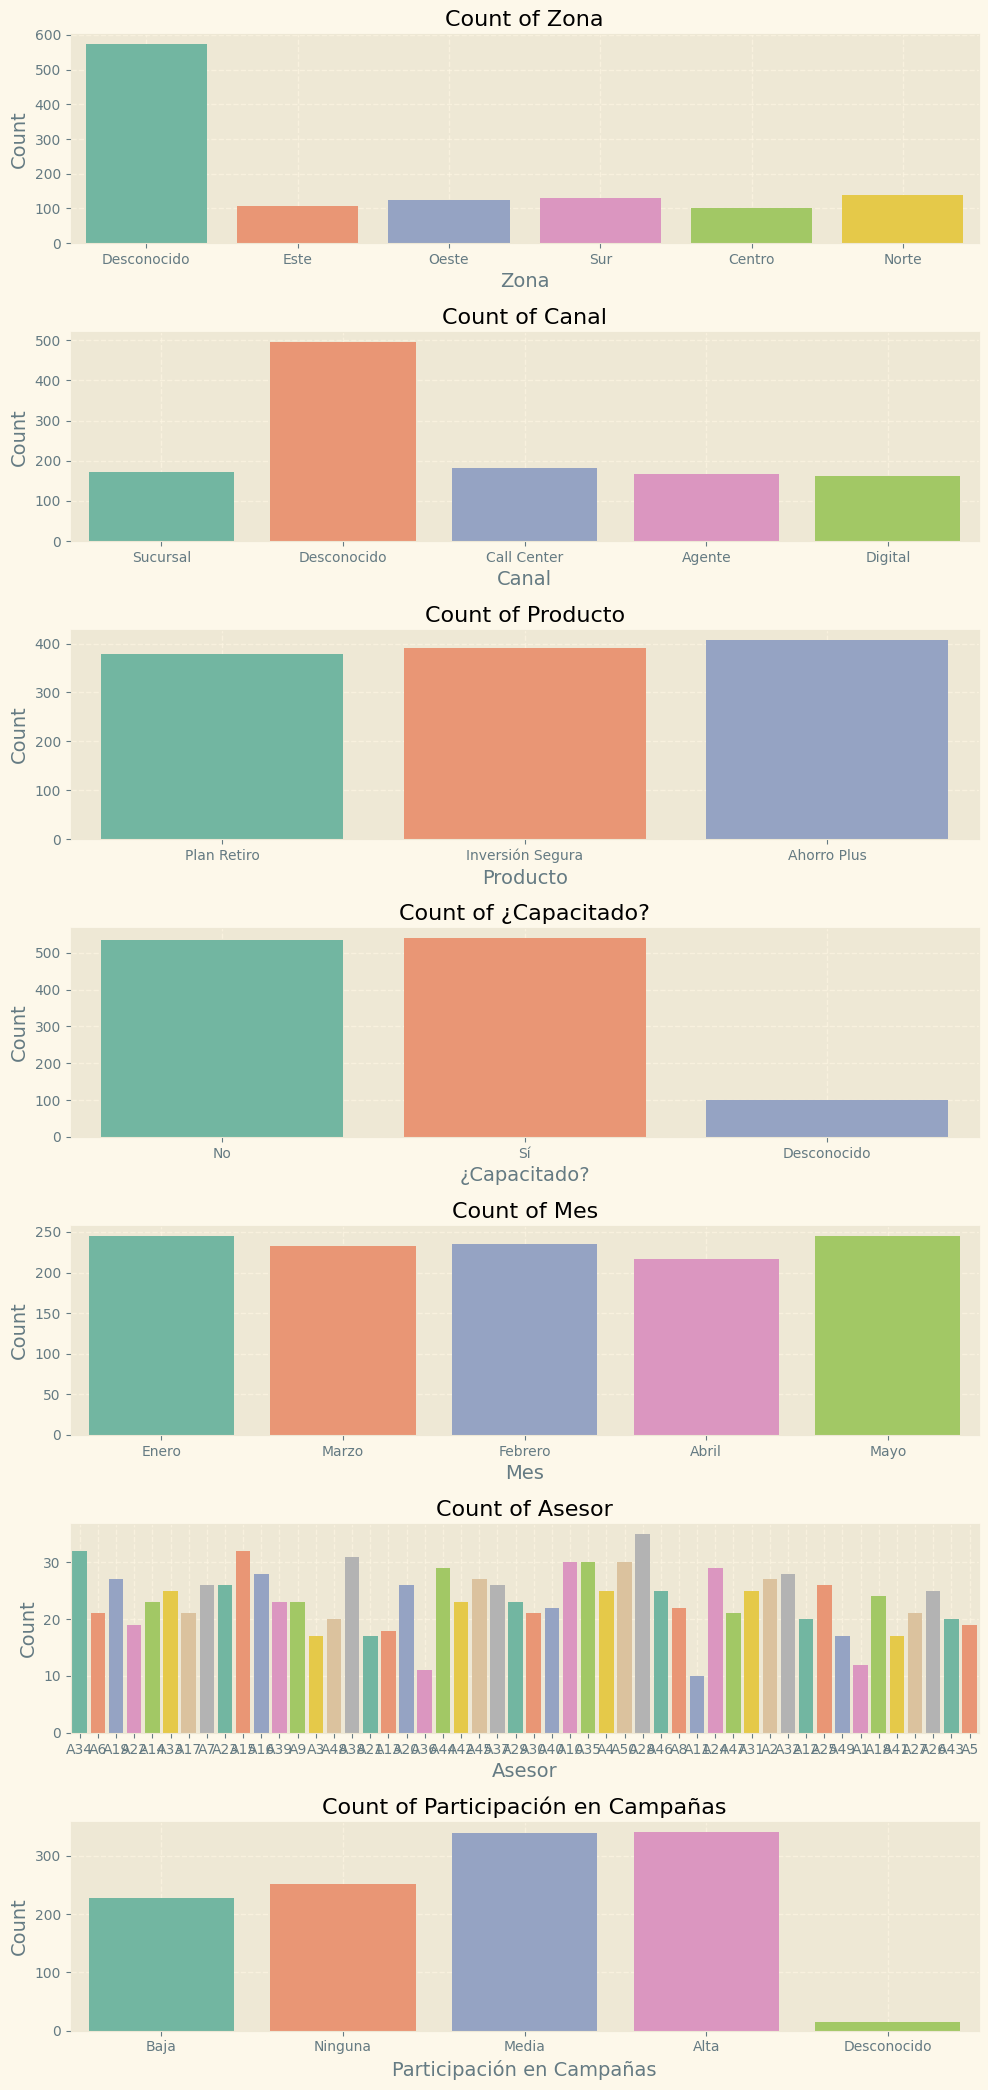

In [10]:
n = len(col_categorical)
fig, axes = plt.subplots(n, 1, figsize=(10, 3 * n), facecolor=fig_facecolor)
for i, col in enumerate(col_categorical):
    sns.countplot(data=df, x=col, hue=col, ax=axes[i], palette='Set2', legend=False)
    axes[i].set_title(f'Count of {col}', fontsize=16)
    axes[i].set_facecolor(ax_facecolor)
    axes[i].set_xlabel(col, fontsize=14)
    axes[i].set_ylabel('Count', fontsize=14)
    axes[i].grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Bivariate Analysis with Sales

In [11]:
mes_a_num = {
    "Enero": 1, 
    "Febrero": 2, 
    "Marzo": 3, 
    "Abril": 4,
    "Mayo": 5
}
df['Mes'] = pd.Categorical(df['Mes'], categories=mes_a_num.keys(), ordered=True)

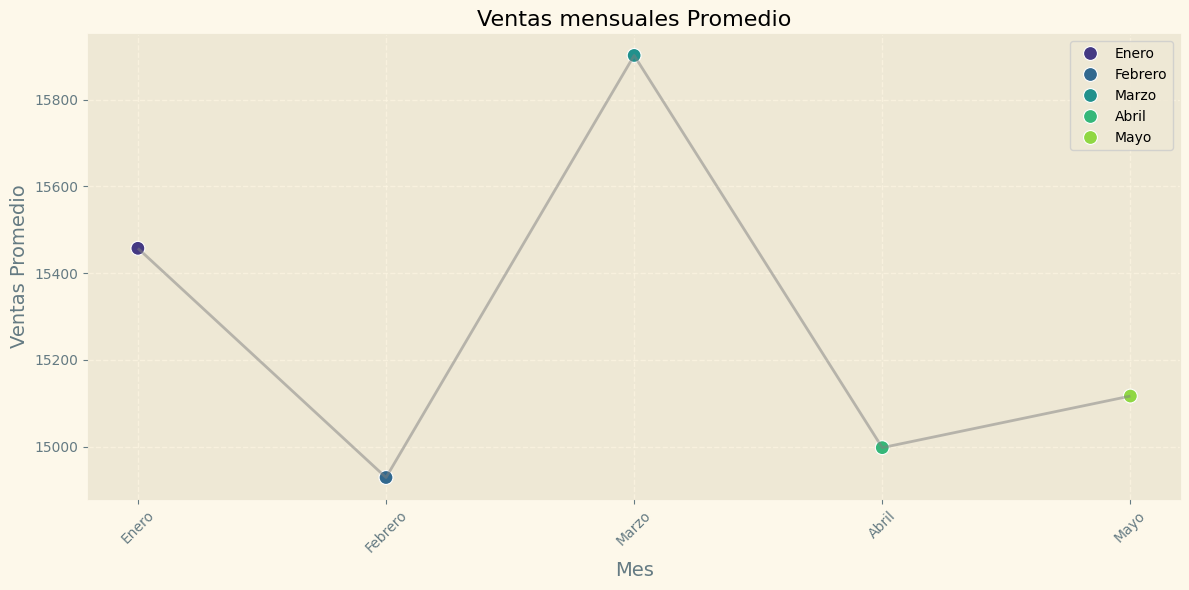

In [12]:
ventas_mensuales = df.groupby('Mes', observed=False)['Monto de Venta'].mean().reset_index()
ventas_mensuales['Mes'] = pd.Categorical(ventas_mensuales['Mes'], categories=mes_a_num.keys(), ordered=True)
ventas_mensuales = ventas_mensuales.sort_values('Mes')

plt.figure(figsize=(12, 6), facecolor=fig_facecolor)
sns.scatterplot(data=ventas_mensuales, x='Mes', y='Monto de Venta', hue='Mes', palette='viridis', s=100)
sns.lineplot(data=ventas_mensuales, x='Mes', y='Monto de Venta', color='gray', alpha=0.5)

plt.title('Ventas mensuales Promedio', fontsize=16)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Ventas Promedio', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [13]:
df.columns

Index(['ID del Cliente', 'Zona', 'Canal', 'Producto', 'Monto de Venta',
       'Edad del Cliente', '¿Capacitado?', 'Inversión en Publicidad', 'Mes',
       'Asesor', '% Cumplimiento Objetivo', '% Clientes Nuevos',
       'Participación en Campañas', 'Antigüedad del Asesor (meses)'],
      dtype='object')

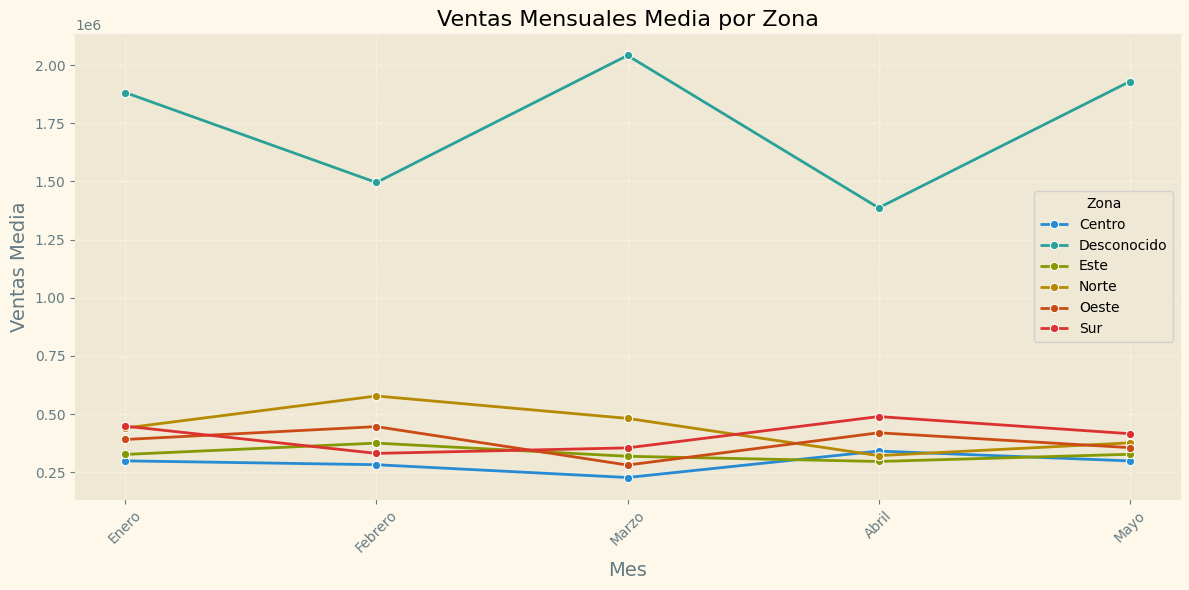

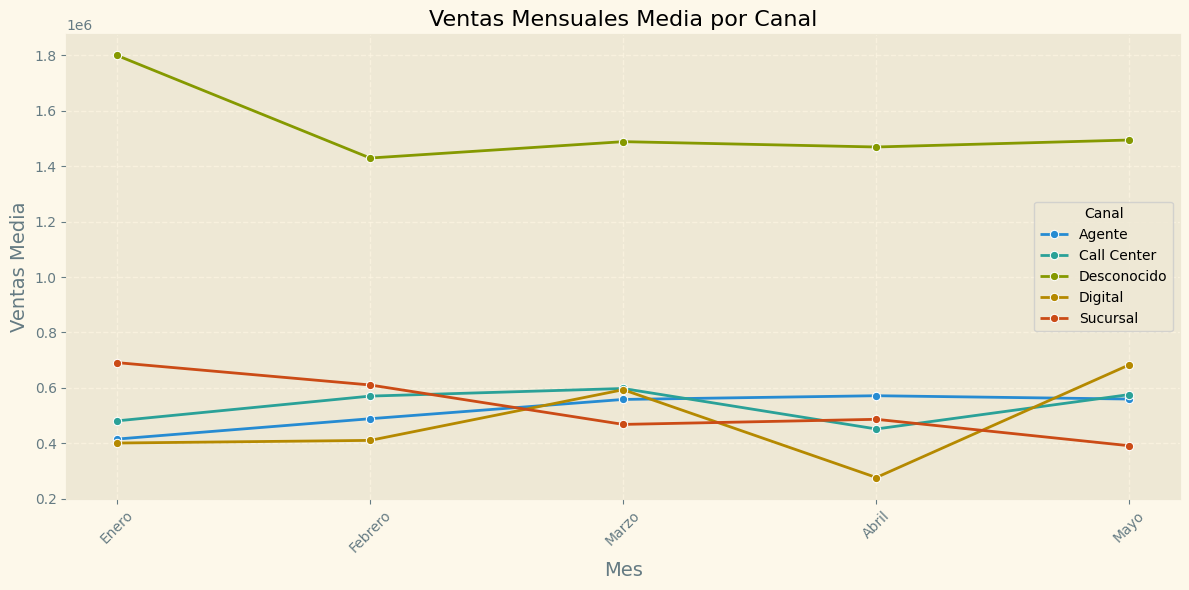

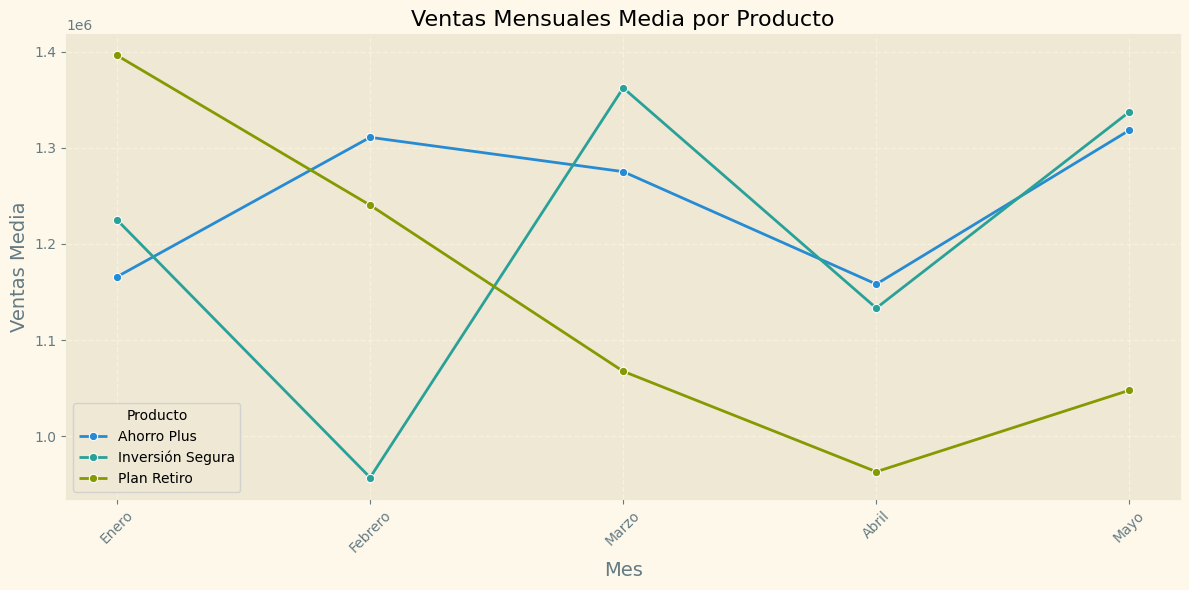

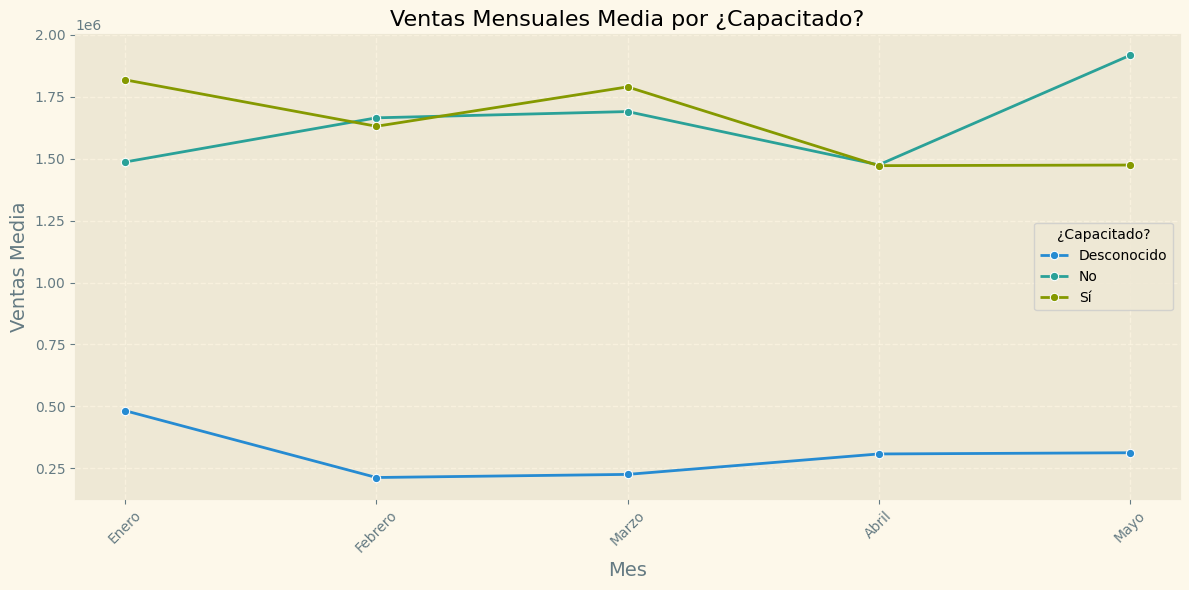

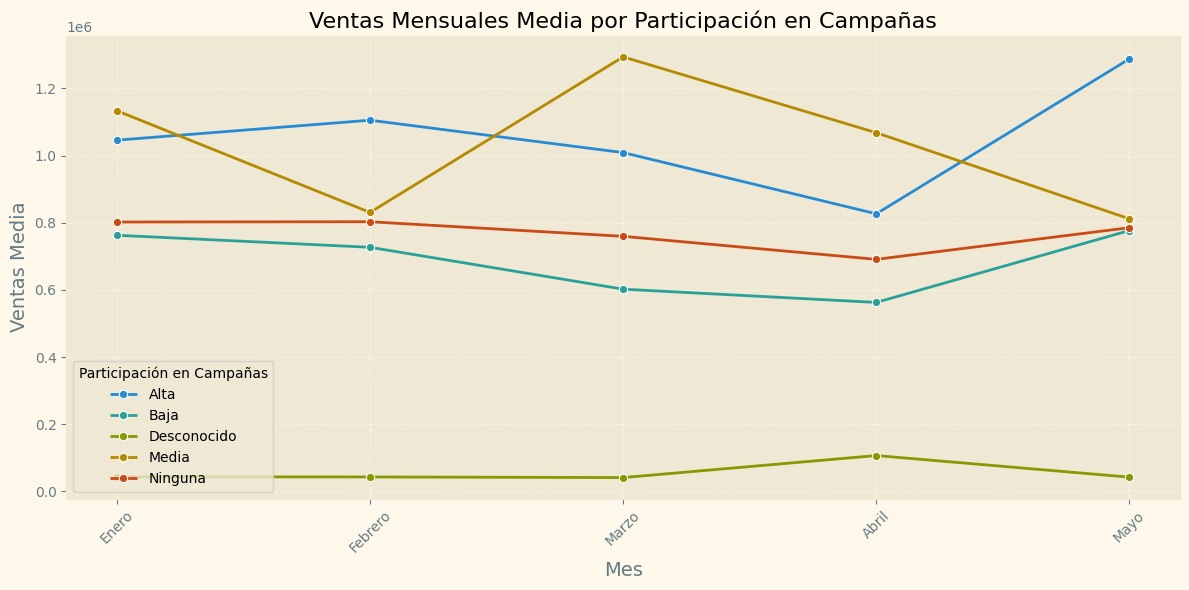

In [14]:
cols = ['Zona', 'Canal', 'Producto', '¿Capacitado?', 'Participación en Campañas']

palette = sns.color_palette("tab10")

for col in cols:
    # Agrupar
    ventas_mensuales = (
        df.groupby(['Mes', col], observed=False)['Monto de Venta']
        .sum()
        .reset_index()
    )

    # Ordenar meses
    ventas_mensuales['Mes'] = pd.Categorical(
        ventas_mensuales['Mes'],
        categories=mes_a_num.keys(),
        ordered=True
    )
    ventas_mensuales = ventas_mensuales.sort_values('Mes')

    # Plot
    plt.figure(figsize=(12, 6), facecolor=fig_facecolor)
    sns.lineplot(
        data=ventas_mensuales,
        x='Mes',
        y='Monto de Venta',
        hue=col,
        marker='o'
    )

    plt.title(f'Ventas Mensuales Media por {col}', fontsize=16)
    plt.xlabel('Mes', fontsize=14)
    plt.ylabel('Ventas Media', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title=col)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()



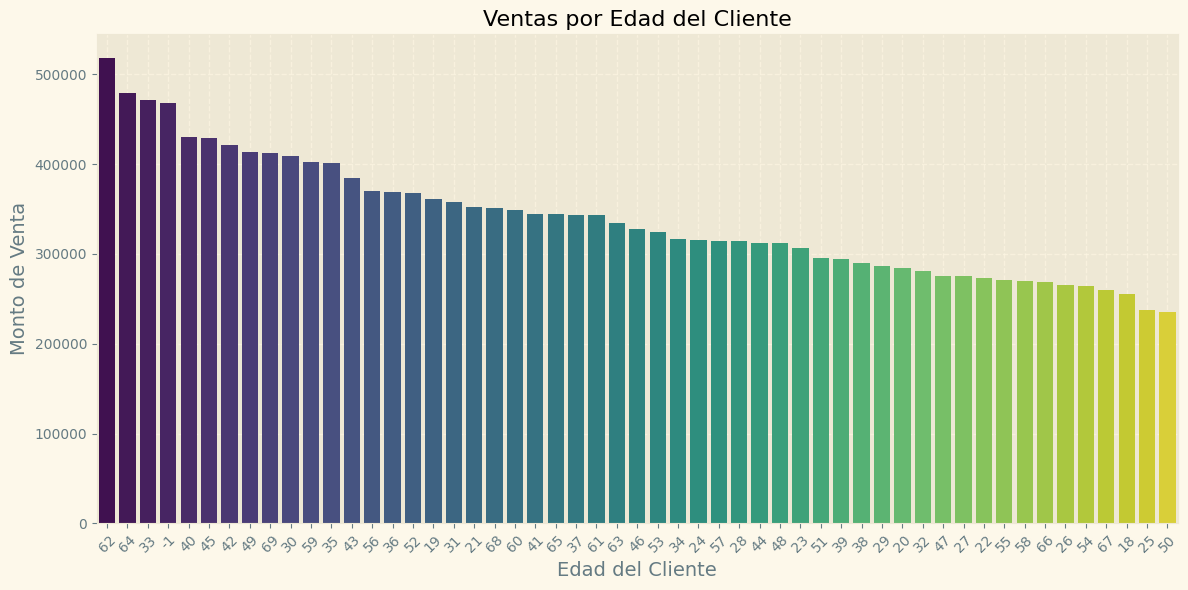

In [15]:
df_clientes = df.groupby('Edad del Cliente')['Monto de Venta'].sum().reset_index()
df_clientes['Edad del Cliente'] = df_clientes['Edad del Cliente'].astype(str)
df_clientes = df_clientes.sort_values('Monto de Venta', ascending=False)

plt.figure(figsize=(12, 6), facecolor=fig_facecolor)
sns.barplot(data=df_clientes, x='Edad del Cliente', y='Monto de Venta', hue='Edad del Cliente', palette='viridis')
plt.title('Ventas por Edad del Cliente', fontsize=16)
plt.xlabel('Edad del Cliente', fontsize=14)
plt.ylabel('Monto de Venta', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

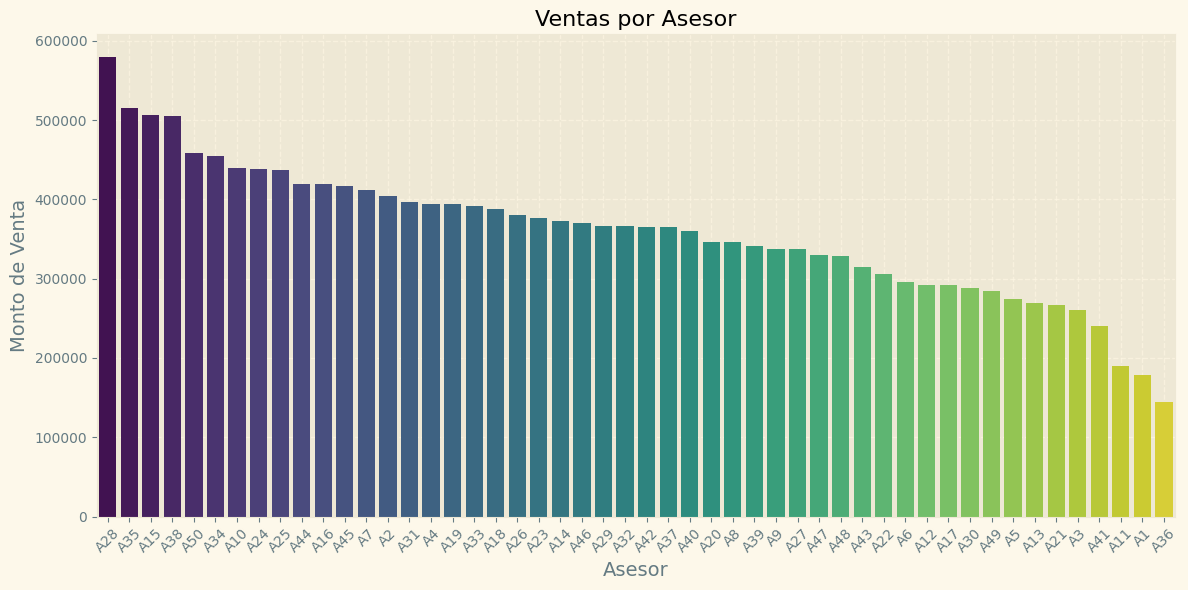

In [16]:
df_asesor =df.groupby('Asesor')['Monto de Venta'].sum().reset_index()
df_asesor = df_asesor.sort_values('Monto de Venta', ascending=False)
plt.figure(figsize=(12, 6), facecolor=fig_facecolor)
sns.barplot(data=df_asesor, x='Asesor', y='Monto de Venta', hue='Asesor', palette='viridis')
plt.title('Ventas por Asesor', fontsize=16)
plt.xlabel('Asesor', fontsize=14)
plt.ylabel('Monto de Venta', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

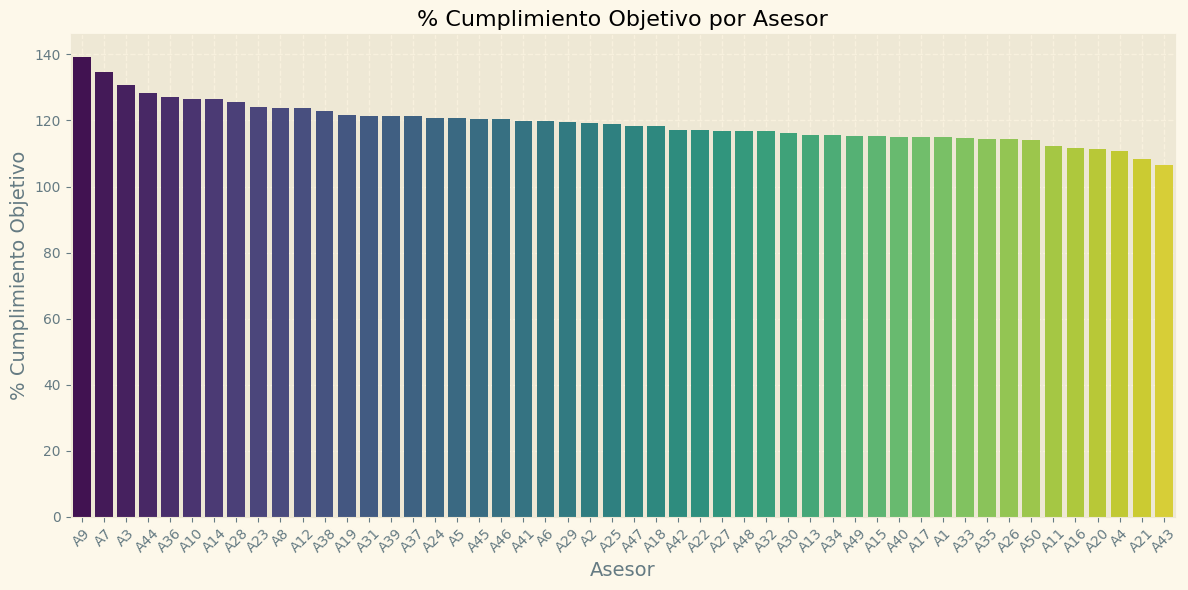

In [17]:
df_asesor =df.groupby('Asesor')['% Cumplimiento Objetivo'].max().reset_index()
df_asesor = df_asesor.sort_values('% Cumplimiento Objetivo', ascending=False)
plt.figure(figsize=(12, 6), facecolor=fig_facecolor)
sns.barplot(data=df_asesor, x='Asesor', y='% Cumplimiento Objetivo', hue='Asesor', palette='viridis')
plt.title('% Cumplimiento Objetivo por Asesor', fontsize=16)
plt.xlabel('Asesor', fontsize=14)
plt.ylabel('% Cumplimiento Objetivo', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()